In [1]:
import os
import h5py
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib import rcParams
# Set font to Arial
rcParams['font.family'] = 'Arial'
from matplotlib.ticker import MultipleLocator

import csv

from scipy.interpolate import griddata

import json

# from matplotlib import widgets
#Stackreg Regstrations
#https://pypi.org/project/pystackreg/
from pystackreg import StackReg

#Phase cross correlation
from skimage import data
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
from scipy.ndimage import fourier_shift
from skimage.registration._phase_cross_correlation import _upsampled_dft

import scipy.ndimage as ndi

from ipywidgets import interact, widgets

from skimage import filters
from skimage import morphology
from skimage.segmentation import watershed

from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline

import cv2

# Laod XMCD Spectrum

In [2]:
root_path = ''
# print(root_path)

In [3]:
fname = 'energy_line'
data_txt = root_path + fname + '.txt'
print(data_txt)

energy_line = np.loadtxt(data_txt)

C:/Users/yamamoto/Dropbox/MPI/Project/MnTe/Beamtime/BESSY_MAXYMUS_Jan2025/Analyzed/Spectra/energy_line.txt


In [4]:
fname = 'xmcd_line'
data_txt = root_path + fname + '.txt'
print(data_txt)

xmcd_line = np.loadtxt(data_txt)

C:/Users/yamamoto/Dropbox/MPI/Project/MnTe/Beamtime/BESSY_MAXYMUS_Jan2025/Analyzed/Spectra/xmcd_line.txt


In [5]:
fname = 'dark_xmcd_line'
data_txt = root_path + fname + '.txt'
print(data_txt)

dark_xmcd_line = np.loadtxt(data_txt)

C:/Users/yamamoto/Dropbox/MPI/Project/MnTe/Beamtime/BESSY_MAXYMUS_Jan2025/Analyzed/Spectra/dark_xmcd_line.txt


# Load XMCD images

In [6]:
energy_list = [640.05, 640.3, 640.3, 640.55, 640.9, 641.4, 641.4, 641.8, 642.45, 643.0, 644.4, 651.4, 652.0, 653.3]

scanNums_lcp = [25, 27, 30, 32, 35, 38, 40, 43, 46, 50, 53, 66, 69, 71]
scanNums_rcp = [26, 28, 31, 33, 36, 39, 41, 44, 47, 51, 54, 67, 70, 72]

In [7]:
root_path = ''
# print(root_path)

images = []

for i, energy in enumerate(energy_list):
    fname = 'cropped_aligned_images_xmcd_%.2feV_%03d_%03d' %(energy, scanNums_lcp[i], scanNums_rcp[i])
    # print(fname)
    
    image_npy = root_path + fname + '.npy'

    image = np.load(image_npy)
    images.append(image)

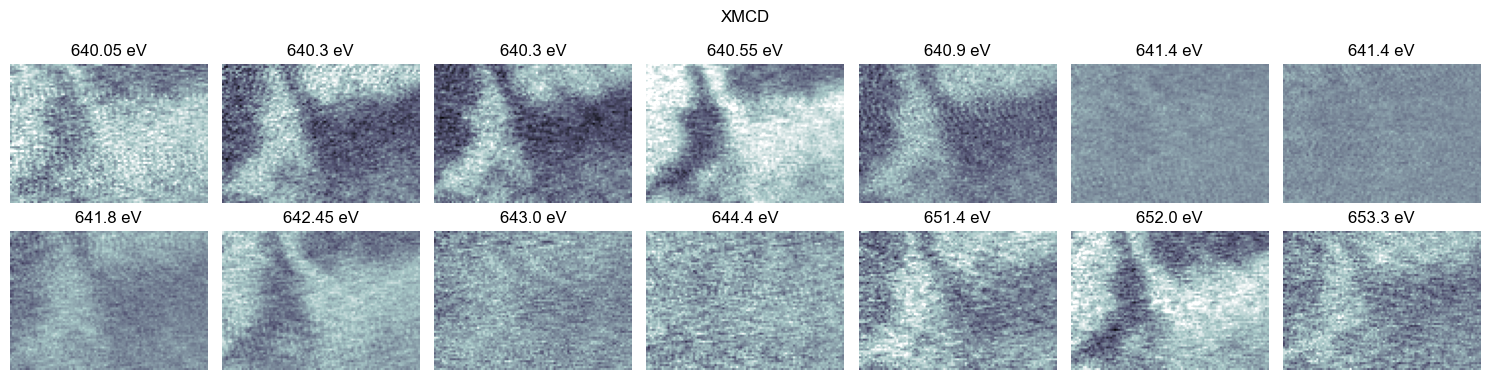

In [9]:
nrows = 2
ncols = 7

fig, ax1 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,2*nrows))

ax1 = ax1.flatten()


for i, ax in enumerate(ax1):
    if i < len(energy_list):
        ax.imshow(images[i], cmap='bone', vmin=-4, vmax=4)
        ax.set_title('%s eV' %(energy_list[i]))
        ax.axis('off')
        #plt.colorbar(im1,ax=ax1)

    else:
        ax.axis('off')
    
    plt.suptitle('XMCD')
        
plt.tight_layout()
plt.show()

In [10]:
blur_images = []

for i, (image) in enumerate(images):
    blur = filters.gaussian(image, sigma=1)
    blur_images.append(blur)

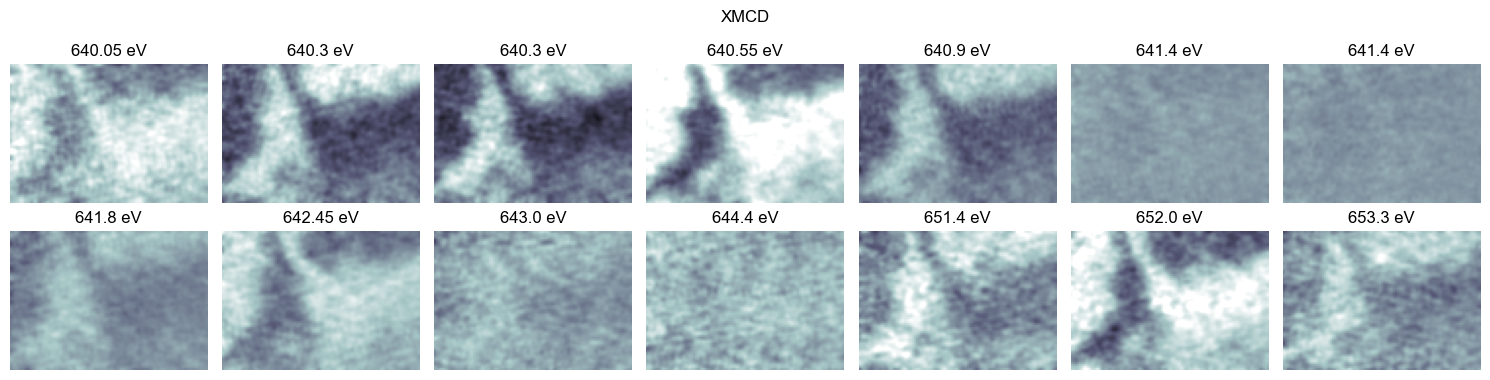

In [11]:
nrows = 2
ncols = 7

fig, ax1 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,2*nrows))

ax1 = ax1.flatten()


for i, ax in enumerate(ax1):
    if i < len(energy_list):
        ax.imshow(blur_images[i], cmap='bone', vmin=-3, vmax=3)
        ax.set_title('%s eV' %(energy_list[i]))
        ax.axis('off')
        #plt.colorbar(im1,ax=ax1)

    else:
        ax.axis('off')
    
    plt.suptitle('XMCD')
        
plt.tight_layout()
plt.show()

In [78]:
# pos0 = [15, 40] # Left top
# pos1 = [40, 40] 

# width = 10 
# height = 10

In [79]:
# i = 3
# image = blur_images[i]

# fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# #
# im1=ax1.imshow(image, cmap='bone', vmin=-5,vmax=5)
# ax1.set_title('%s eV' %(energy_list[i]))
# plt.colorbar(im1,ax=ax1)
# ax1.add_patch(Rectangle(pos0, width, height, facecolor ='none',  edgecolor ='red', linewidth = 2))
# ax1.add_patch(Rectangle(pos1, width, height, facecolor ='none',  edgecolor ='blue', linewidth = 2))
# # ax1.axis('off')
# # ax1.grid()

# # image_png = save_image_path + 'spectra_pos' + '.png'
# # # print(image_png)
# # plt.savefig(image_png, dpi=300, bbox_inches='tight', pad_inches=0)
# # # plt.close()  # Close the figure to free up memory

# # # image_npy = save_image_path + fname + '.npy'
# # # np.save(image_npy, image)
# # # # np.save(image_npy, blur)

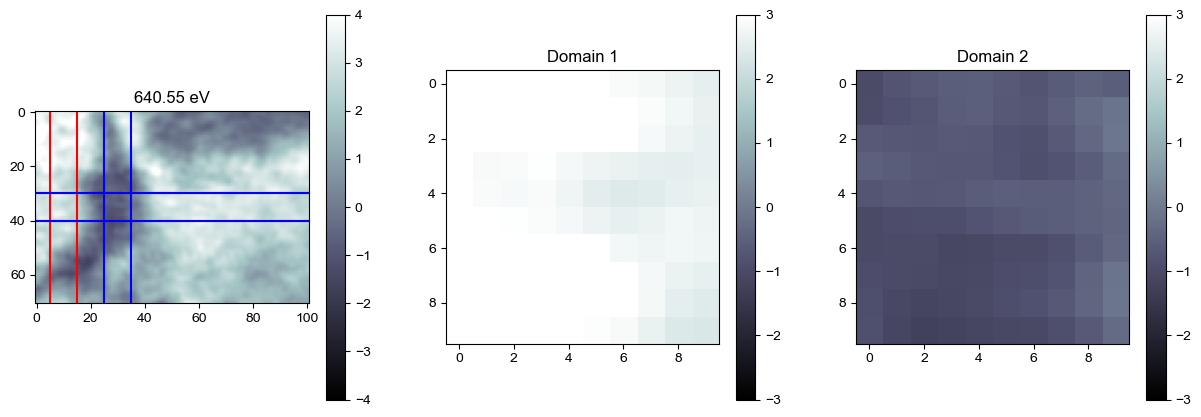

In [13]:
posx0 = 5
posy0 = 30

posx1 = 25
posy1 = 30

width = 10
hight = width

i = 3
image = blur_images[i]

fig,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#
im1=ax1.imshow(image, cmap='bone', vmin=-4,vmax=4)
ax1.set_title('%s eV' %(energy_list[i]))
plt.colorbar(im1,ax=ax1)

# ax1.add_patch(Rectangle(pos0, width, height, facecolor ='none',  edgecolor ='red', linewidth = 2))
# ax1.add_patch(Rectangle(pos1, width, height, facecolor ='none',  edgecolor ='blue', linewidth = 2))

ax1.axvline(posx0, color='red')
ax1.axvline(posx0+width, color='red')
ax1.axhline(posy0, color='red')
ax1.axhline(posy0+hight, color='red')

ax1.axvline(posx1, color='blue')
ax1.axvline(posx1+width, color='blue')
ax1.axhline(posy1, color='blue')
ax1.axhline(posy1+hight, color='blue')
# ax1.axis('off')
# ax1.grid()

#
im2=ax2.imshow(image[posy0:posy0+hight,posx0:posx0+width], cmap='bone', vmin=-3,vmax=3)
ax2.set_title('Domain 1')
plt.colorbar(im2,ax=ax2)
# ax1.axis('off')
# ax1.grid()

#
im3=ax3.imshow(image[posy1:posy1+hight,posx1:posx1+width], cmap='bone', vmin=-3,vmax=3)
ax3.set_title('Domain 2')
plt.colorbar(im3,ax=ax3)

In [14]:
images = blur_images

int0_list = []
int1_list = []
intdiff_list = []

int0_std_list = []
int1_std_list = []
intdiff_std_list = []

for i, (image) in enumerate(images):
    int0 = np.mean(image[posy0:posy0+hight,posx0:posx0+width])
    int0_std = np.std(image[posy0:posy0+hight,posx0:posx0+width])
    # print(int0)

    int1 = np.mean(image[posy1:posy1+hight,posx1:posx1+width])
    int1_std = np.std(image[posy1:posy1+hight,posx1:posx1+width])
    # print(int1)
    
    int0_list.append(int0)
    int1_list.append(int1)

    int0_std_list.append(int0_std)
    int1_std_list.append(int1_std)

    intdiff = (int0 - int1) / 2
    intdiff_std = (int0_std + int1_std) / 2
    
    intdiff_list.append(intdiff)
    intdiff_std_list.append(intdiff_std)
    
    
    # print(i, int0, int1, intdiff)

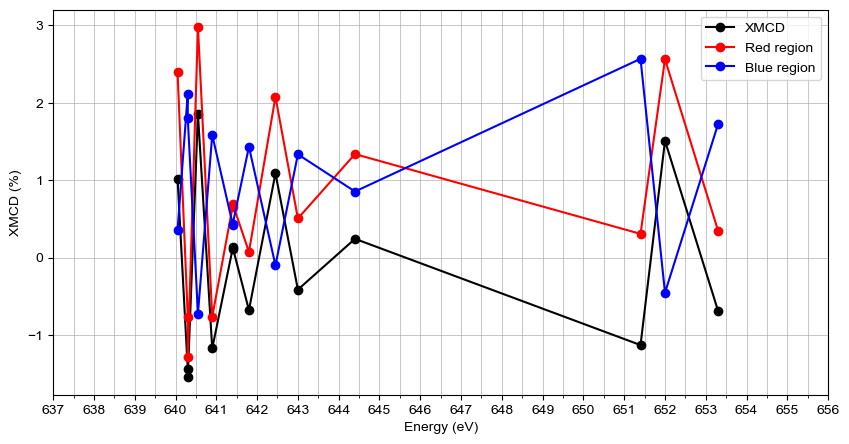

In [15]:
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

#
im1=ax1.plot(energy_list, intdiff_list, color='black', marker='o', label='XMCD')
im1=ax1.plot(energy_list, int0_list, color='red', marker='o', label='Red region')
im1=ax1.plot(energy_list, int1_list, color='blue', marker='o', label='Blue region')

major_ticks = np.arange(629.0, 663.0, 1)
minor_ticks = np.arange(629.0, 663.0, 0.5)

ax = plt.gca()  # Get the current axes
ax.grid(True, which='both', linewidth=0.5)  # Add grid
# plt.title("Intensity Profile Along Selected Line")
plt.xlabel('Energy (eV)')
# plt.ylabel('Transmission')
plt.ylabel('XMCD (%)')
plt.legend()

major_ticks = np.arange(629.0, 663.0, 1)
minor_ticks = np.arange(629.0, 663.0, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

ax.set_xlim(637.0, 656.0)

plt.show()

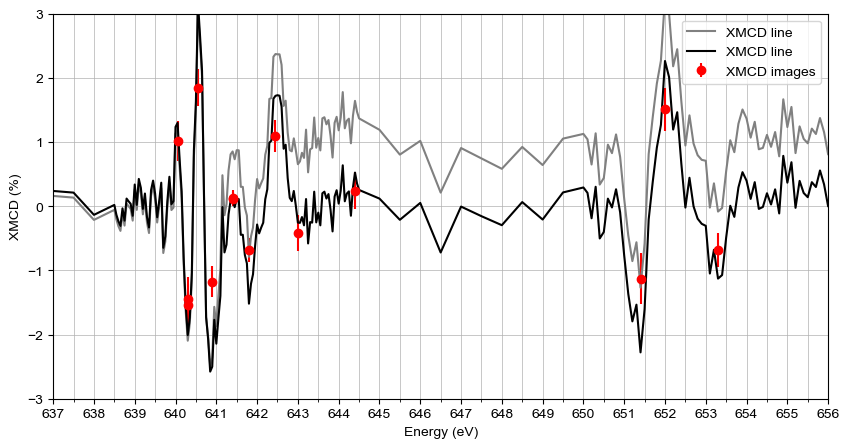

In [17]:
dark_xmcd_line_smooth = filters.gaussian(dark_xmcd_line, sigma=1, preserve_range=True)

fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

#
im1=ax1.errorbar(energy_list, intdiff_list, yerr=intdiff_std_list, color='red', fmt='o', label='XMCD images')
# im1=ax1.errorbar(energy_list, int0_list, yerr=int0_std_list, color='cyan', fmt='o-', label='XMCD')
# im1=ax1.errorbar(energy_list, int1_list, yerr=int1_std_list, color='orange', fmt='o-', label='XMCD')
im1=ax1.plot(energy_line, xmcd_line, color='gray', label='XMCD line')
im1=ax1.plot(energy_line, dark_xmcd_line, color='black', label='XMCD line')
# im1=ax1.plot(energy_line, dark_xmcd_line_smooth, color='black', label='XMCD line smooth')

ax = plt.gca()  # Get the current axes
ax.grid(True, which='both', linewidth=0.5)  # Add grid
# plt.title("Intensity Profile Along Selected Line")
plt.xlabel('Energy (eV)')
# plt.ylabel('Transmission')
plt.ylabel('XMCD (%)')
plt.legend()

major_ticks = np.arange(629.0, 663.0, 1)
minor_ticks = np.arange(629.0, 663.0, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

ax.set_xlim(637.0, 656.0)
ax.set_ylim(-3, 3)

plt.show()

# Save data

In [21]:
save_path = ''
print(save_path)

C:/Users/yamamoto/Dropbox/MPI/Project/MnTe/Beamtime/BESSY_MAXYMUS_Jan2025/Analyzed/XMCD/Series/Cropped/


In [22]:
# energy_list
# intdiff_list
# intdiff_std_list

In [23]:
fname = 'energy_image'

line_npy = save_path + fname + '.txt'
np.savetxt(line_npy, energy_list, fmt="%.4f")

In [24]:
fname = 'xmcd_intdiff_image'

line_npy = save_path + fname + '.txt'
np.savetxt(line_npy, intdiff_list, fmt="%.4f")

In [25]:
fname = 'xmcd_intdiff_std_image'

line_npy = save_path + fname + '.txt'
np.savetxt(line_npy, intdiff_std_list, fmt="%.4f")

In [26]:
fname = 'xmcd_int0_image'

line_npy = save_path + fname + '.txt'
np.savetxt(line_npy, int0_list, fmt="%.4f")

In [27]:
fname = 'xmcd_int1_image'

line_npy = save_path + fname + '.txt'
np.savetxt(line_npy, int1_list, fmt="%.4f")